In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile,os
local_zip = '/content/drive/MyDrive/home-credit-default-risk.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

#EDA

##column Name

In [5]:
app_train = pd.read_csv('/content/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

## data Exploration

In [ ]:
## credits https://www.kaggle.com/code/gpreda/home-credit-default-risk-extensive-eda/notebook#Explore-the-data

In [14]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

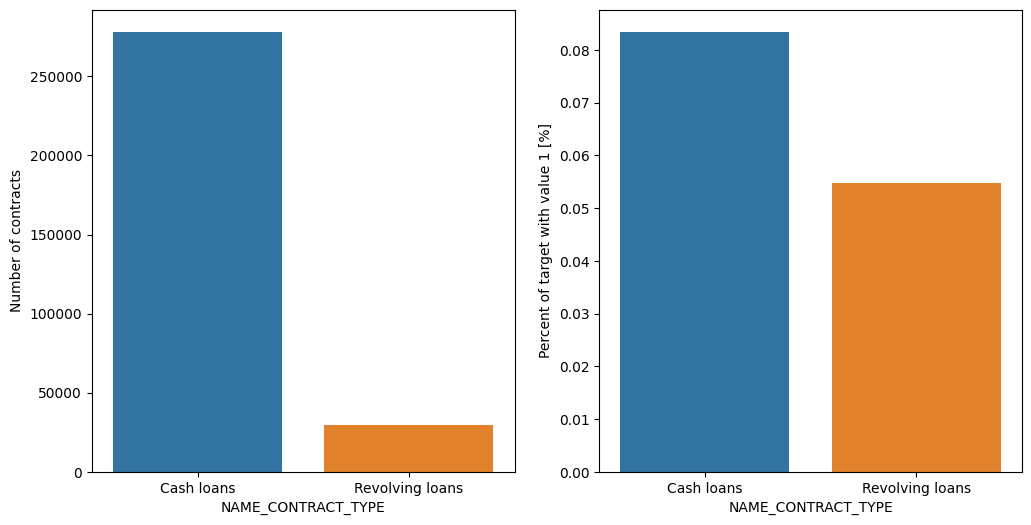

In [15]:
plot_stats('NAME_CONTRACT_TYPE')

banyak jumlah revolving loan dengan cash loan hampir 10 kali lipat. perbandingan pelunasan hutang cash loan lebih banyak 3% dari revolving loan

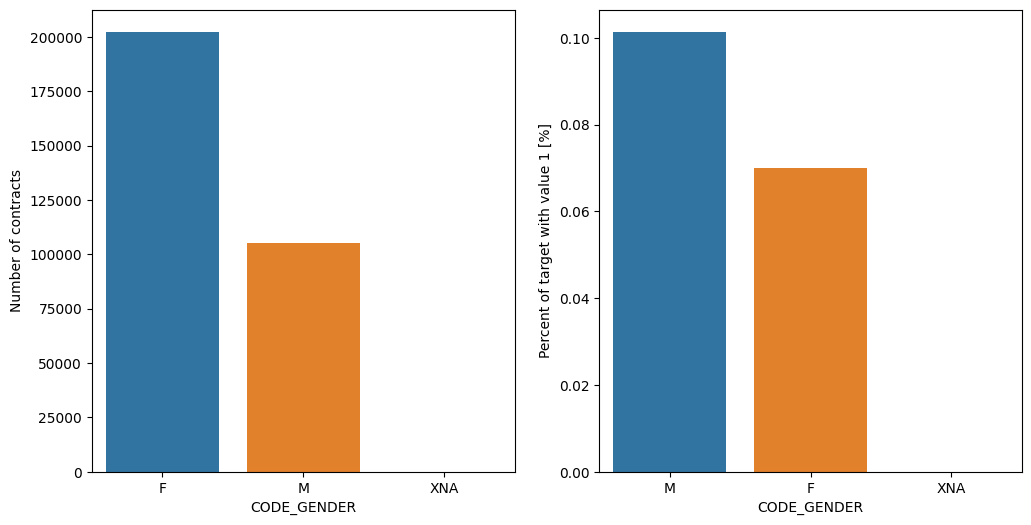

In [16]:
plot_stats('CODE_GENDER')

Jumlah peminjam wanita hampir 2 kali pria, tetapi pria lebih tinggi dalam tidak bisa melunasi hutang

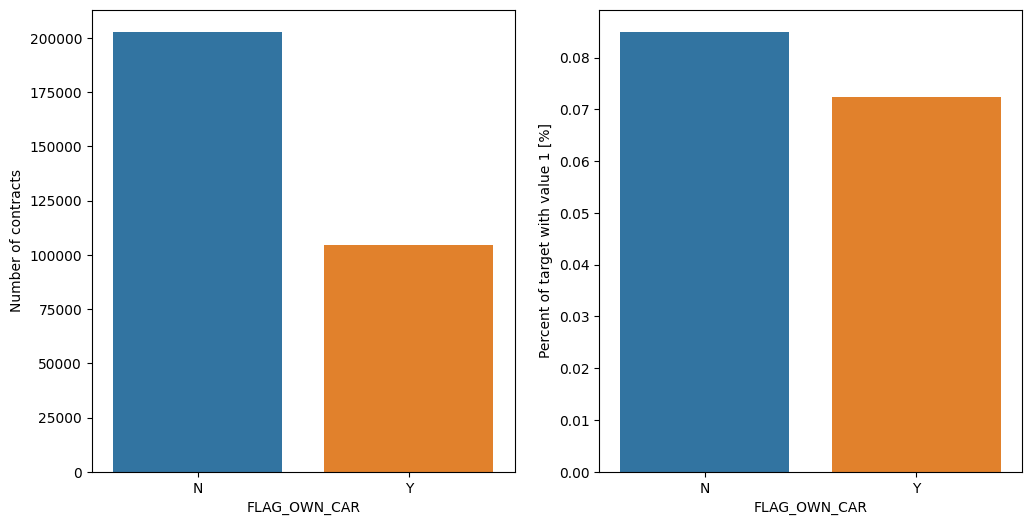

In [18]:
plot_stats('FLAG_OWN_CAR')

jumlah yang memiliki mobil hanya setengan dibanding yang tidak, tetapi presentasi gagal bayarnya hampir sama

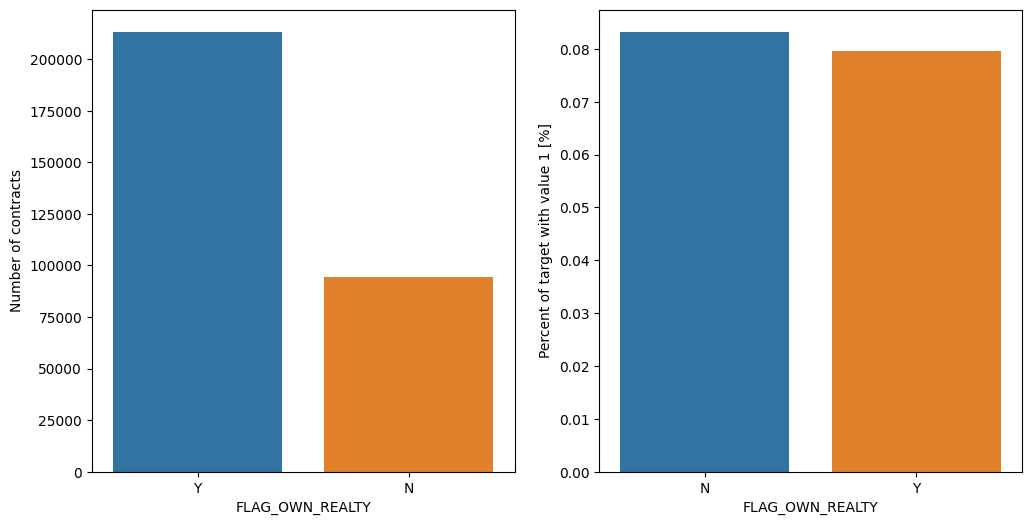

In [19]:
plot_stats('FLAG_OWN_REALTY')

jumlah klien yang tidak memiliki properti berjumlah kurang dari setengah dari yang memiliki properti. tetapi presentasi gagal bayarnya hampir sama.

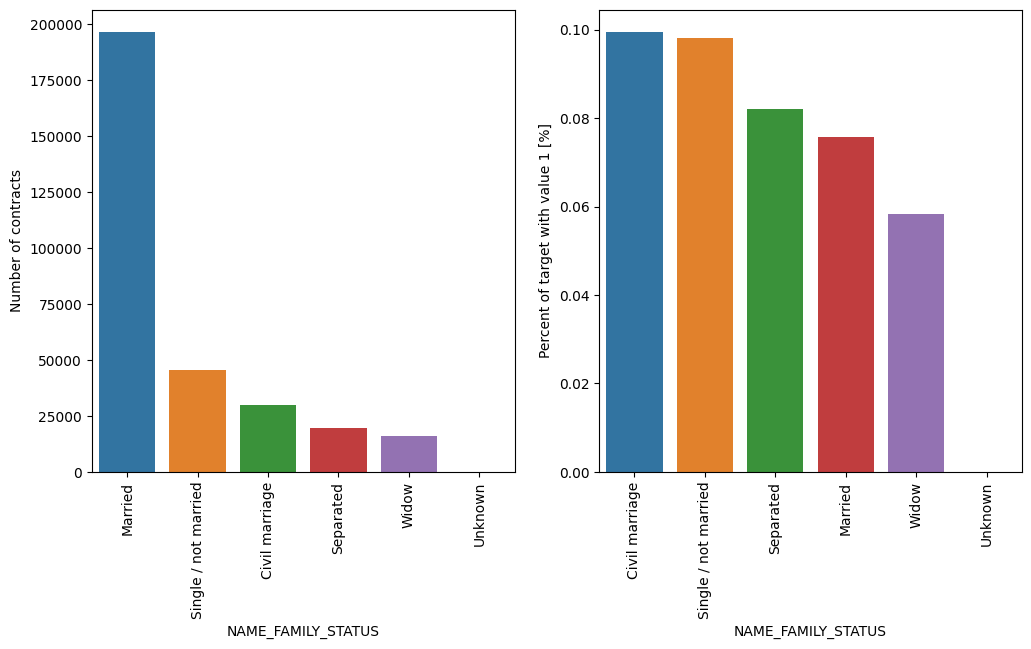

In [17]:
plot_stats('NAME_FAMILY_STATUS',True, True)

kebanyakan kilen memiliki status marriage, tetapi presentasi gagal bayar tertunggi ada pada civil mariage dan single

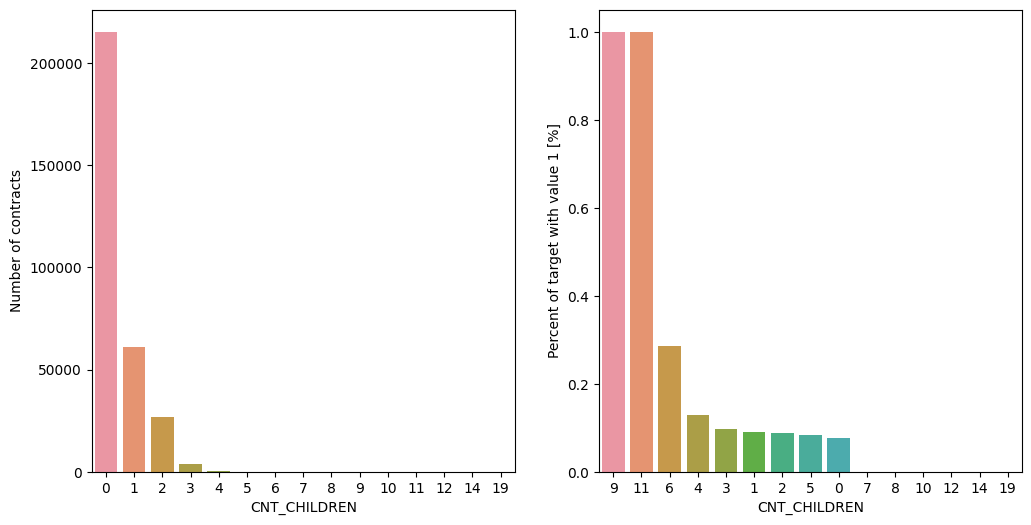

In [20]:
plot_stats('CNT_CHILDREN')

pada umumnya klien memiliki kurang dari 3 anak. untuk anak dengan jumlah 1-5 memiliki presentasi kurang dari 15% gagal bayar. untuk anak dengan jumlah 6 memiliki kemungkinan gagal bayar 25% dan untuk jumlah anak 9 dan 11 memiliki tingkat kegagalan bayar 100%

## Distribution of the Target Column

0    282686
1     24825
Name: TARGET, dtype: int64


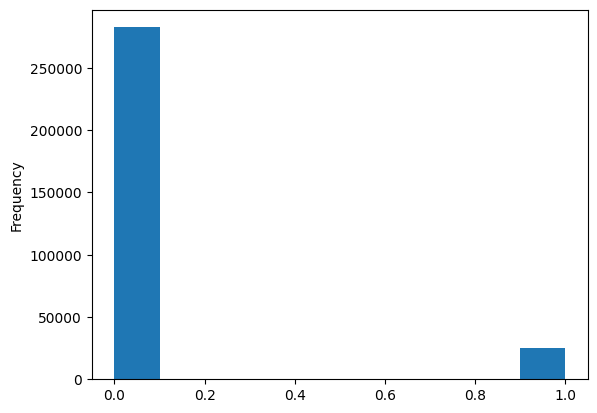

In [6]:
app_train['TARGET'].astype(int).plot.hist();
print(app_train['TARGET'].value_counts())

##Column Type

In [22]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [23]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## encoding categorical variables

categorical variable with 2 unique categories use label encoding, and for any categorical variable with more than 2 unique categories use one-hot encoding

In [25]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [26]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 243)


#Feature Importance

In [27]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

##feature engineering

 we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:


*   CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

*   ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
*   CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due


*   DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

credits https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook#Data

In [28]:
app_train_domain = app_train.copy()

In [29]:
# membuat variable baru untuk data train
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

# Data Preprocessing

## creating new dataframe

In [30]:
new_train_feature= ['TARGET','DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1',
                    'CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']
new_test_feature= ['DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1',
                    'CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']

In [31]:
# data train&test baru
new_app_train = app_train_domain[new_train_feature]

In [32]:
print('Training data shape: ', new_app_train.shape)
new_app_train.head()

Training data shape:  (307511, 9)


,TARGET,DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,1,-9461,0.139376,0.262949,0.083037,2.007889,0.121978,0.060749,0.067329
1,0,-16765,NaN,0.622246,0.311267,4.790750,0.132217,0.027598,0.070862
2,0,-19046,0.729567,0.555912,NaN,2.000000,0.100000,0.050000,0.011814
3,0,-19005,NaN,0.650442,NaN,2.316167,0.219900,0.094941,0.159905
4,0,-19932,NaN,0.322738,NaN,4.222222,0.179963,0.042623,0.152418


## null handling

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

###null counter

In [34]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [35]:
missing_data(new_app_train)

,Total,Percent
EXT_SOURCE_1,173378,56.381073
EXT_SOURCE_3,60965,19.825307
EXT_SOURCE_2,660,0.214626
ANNUITY_INCOME_PERCENT,12,0.003902
CREDIT_TERM,12,0.003902
TARGET,0,0.000000
DAYS_BIRTH,0,0.000000
CREDIT_INCOME_PERCENT,0,0.000000
DAYS_EMPLOYED_PERCENT,0,0.000000


In [36]:
missing_values = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM']
imputed_new_app_train = pd.DataFrame(imputer.fit_transform(new_app_train[missing_values]), columns=missing_values)
new_app_train[missing_values] = imputed_new_app_train

In [37]:
missing_data(new_app_train)

,Total,Percent
TARGET,0,0.0
DAYS_BIRTH,0,0.0
EXT_SOURCE_3,0,0.0
EXT_SOURCE_2,0,0.0
EXT_SOURCE_1,0,0.0
CREDIT_INCOME_PERCENT,0,0.0
ANNUITY_INCOME_PERCENT,0,0.0
CREDIT_TERM,0,0.0
DAYS_EMPLOYED_PERCENT,0,0.0


#Data Preparation

##scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan penskalaan Min-Max pada seluruh DataFrame
scaled_data = scaler.fit_transform(new_app_train)

# Menghasilkan DataFrame yang telah diubah skala
scaled_app_train = pd.DataFrame(scaled_data, columns=new_app_train.columns)

In [39]:
from sklearn.model_selection import train_test_split

X = scaled_app_train.drop("TARGET", axis=1)
y = scaled_app_train["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelling

##Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

###Validation

In [42]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### AUC

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

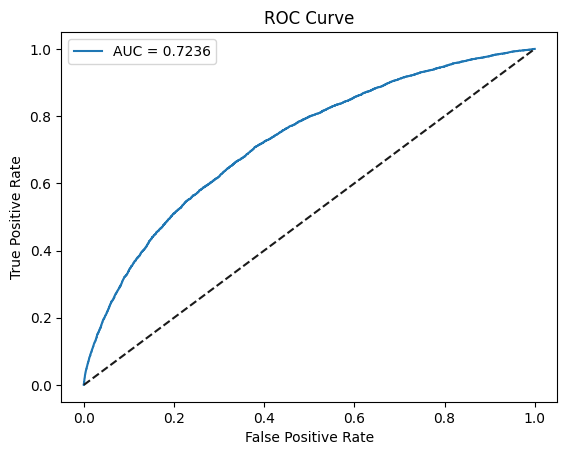

In [44]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [45]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [46]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,21098,0.0,0.033938,1,0.0,1.0,0.000016,0.0,0.000018
1,244564,0.0,0.034168,2,0.0,2.0,0.000033,0.0,0.000035
2,222278,0.0,0.034449,3,0.0,3.0,0.000049,0.0,0.000053
3,303753,0.0,0.034499,4,0.0,4.0,0.000065,0.0,0.000071
4,87741,0.0,0.034532,5,0.0,5.0,0.000081,0.0,0.000088


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3285')

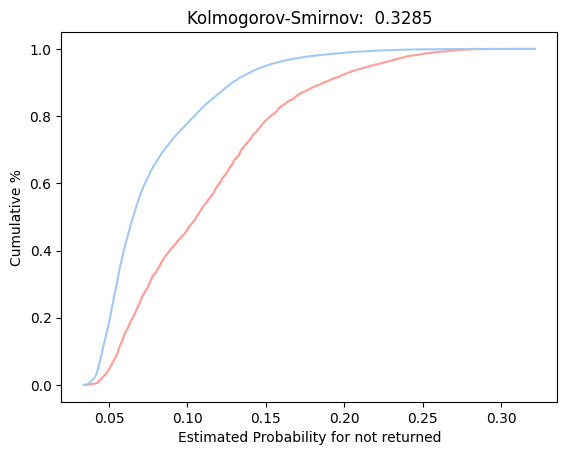

In [48]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)